In [205]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt

# Create vectors and matrices

def matrix(A):
    return np.matrix(A,dtype=float,copy=True)

def identity(N):
    return matrix(np.identity(N))

def zeros(s):
    return matrix(np.zeros(s))

def ones(s):
    return matrix(np.ones(s))

def block(arrs):
    return matrix(np.block(arrs))

def randint(low,high,size):
    return matrix(np.random.randint(low,high,size=size))

def random(size):
    return matrix(np.random.random(size))

# Elementary row operations

def add_row(A,c,i,j):
    "Add c times row i to row j"
    M = matrix(A)
    M[j,:] = c*M[i,:] + M[j,:]
    return M

def scale_row(A,c,i):
    "Multiply c times row i"
    M = matrix(A)
    M[i,:] = c*M[i,:]
    return M

def switch_row(A,i,j):
    "Switch row i and row j"
    M = matrix(A)
    ri = M[i,:].copy()
    rj = M[j,:].copy()
    M[i,:] = rj
    M[j,:] = ri
    return M

def rref(A):
    "Compute reduced row echelon form of matrix A."
    U = matrix(A)
    m,n = U.shape
    pivot = 0
    for j in range(0,n):
        imax = np.argmax(np.abs(U[pivot:,j]))
        if U[pivot + imax,j] != 0:
            U = switch_row(U,pivot,pivot + imax)
        else:
            continue
        U = scale_row(U,1/U[pivot,j],pivot)
        for i in range(m):
            if i == pivot:
                continue
            else:
                U = add_row(U,-U[i,j],pivot,i)
        pivot += 1
        U = np.round(U,14) + 0.0
        if pivot == m:
            break
    return U

# Vector operations

def dot(u,v):
    return np.sum(np.multiply(u,v))

# Visualization
def imshow(A):
    plt.imshow(A,cmap='RdBu')
    c = np.max(np.abs(A))
    plt.clim([-c,c])
    plt.colorbar()
    plt.show()

In [216]:
A = random((15,18))

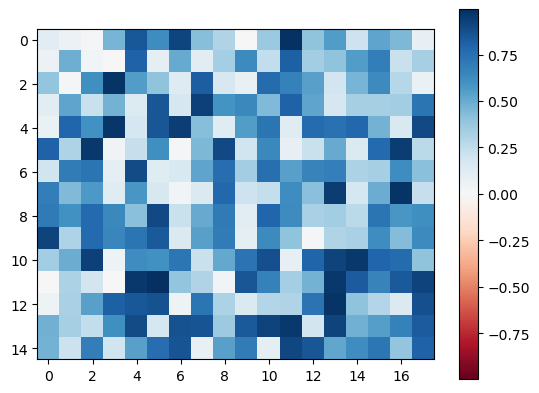

In [217]:
imshow(A)

In [218]:
U = rref(A)

In [219]:
print(U)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  3.43814660e+00
   4.56347014e+00 -2.71910325e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  7.12314629e+00
   2.99178250e+00 -2.67824376e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  6.11900147e+00
  -7.87189259e-01 -4.90484160e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.

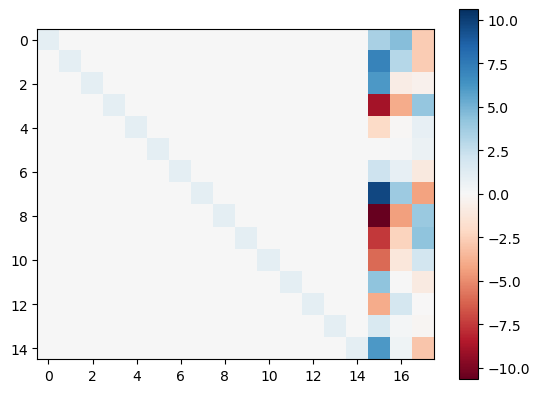

In [220]:
imshow(U)